In [1]:
import get_data
clusters = get_data.read_csv('epidemic','clusters')

In [2]:
clusters = get_data.convert_state_code(clusters)

## Overview of clusters

In [3]:
clusters.head()

,cluster,state,district,date_announced,date_last_onset,category,status,cases_new,cases_total,cases_active,tests,icu,deaths,recovered,summary_bm,summary_en
0,KLUSTER WARGA JEPUN,W.P. KUALA LUMPUR,LEMBAH PANTAI,2020-03-01,2020-03-09,import,ended,0,3,0,267,0,0,3,NaN,NaN
1,KLUSTER UDA,"JOHOR,NEGERI SEMBILAN,SELANGOR,W.P. KUALA LUMP...",PELBAGAI,2020-03-04,2020-03-01,import,ended,0,144,0,1864,0,2,142,NaN,NaN
2,KLUSTER KEAGAMAAN (TABLIGH SRI PETALING),not stated,PELBAGAI,2020-03-13,2020-03-11,religious,ended,0,2022,0,42023,0,34,1988,NaN,NaN
3,KLUSTER TABLIGH NEW DELHI,"NEGERI SEMBILAN,SELANGOR,W.P. KUALA LUMPUR,W.P...",PELBAGAI,2020-03-16,2020-03-20,import,ended,0,24,0,57,0,0,24,NaN,NaN
4,KLUSTER AIROD,PAHANG,KUANTAN,2020-03-31,2020-03-31,workplace,ended,0,65,0,734,0,0,65,NaN,NaN


## States with highest number of cases

In [4]:
import pandas as pd               # for data visualization 
import numpy as np                # For numerical Or mathematical operation
import seaborn as sns             # for visualization
import matplotlib.pyplot as plt   # for visualization
%matplotlib inline

#States with the highest number of cases
Total_cases = clusters[['state','cases_total']].sort_values(by=['cases_total'],ascending=False).reset_index(drop=True)


pivot = Total_cases.pivot_table(index=['state'], values=['cases_total'], aggfunc='sum')
print(pivot)

Total_cases.loc[Total_cases["cases_total"]>7000]

                                                    cases_total
state                                                          
JOHOR                                                     69609
JOHOR,KEDAH                                                1840
JOHOR,KEDAH,KELANTAN,MELAKA,NEGERI SEMBILAN,PER...          159
JOHOR,KEDAH,PERAK                                           212
JOHOR,KEDAH,PULAU PINANG,PERAK,SELANGOR,W.P. KU...          252
...                                                         ...
W.P. KUALA LUMPUR,W.P. LABUAN                                58
W.P. KUALA LUMPUR,W.P. PUTRAJAYA                            847
W.P. LABUAN                                                3806
W.P. PUTRAJAYA                                              536
not stated                                                 2022

[141 rows x 1 columns]


,state,cases_total
0,"NEGERI SEMBILAN,SELANGOR,TERENGGANU,W.P. KUALA...",7205


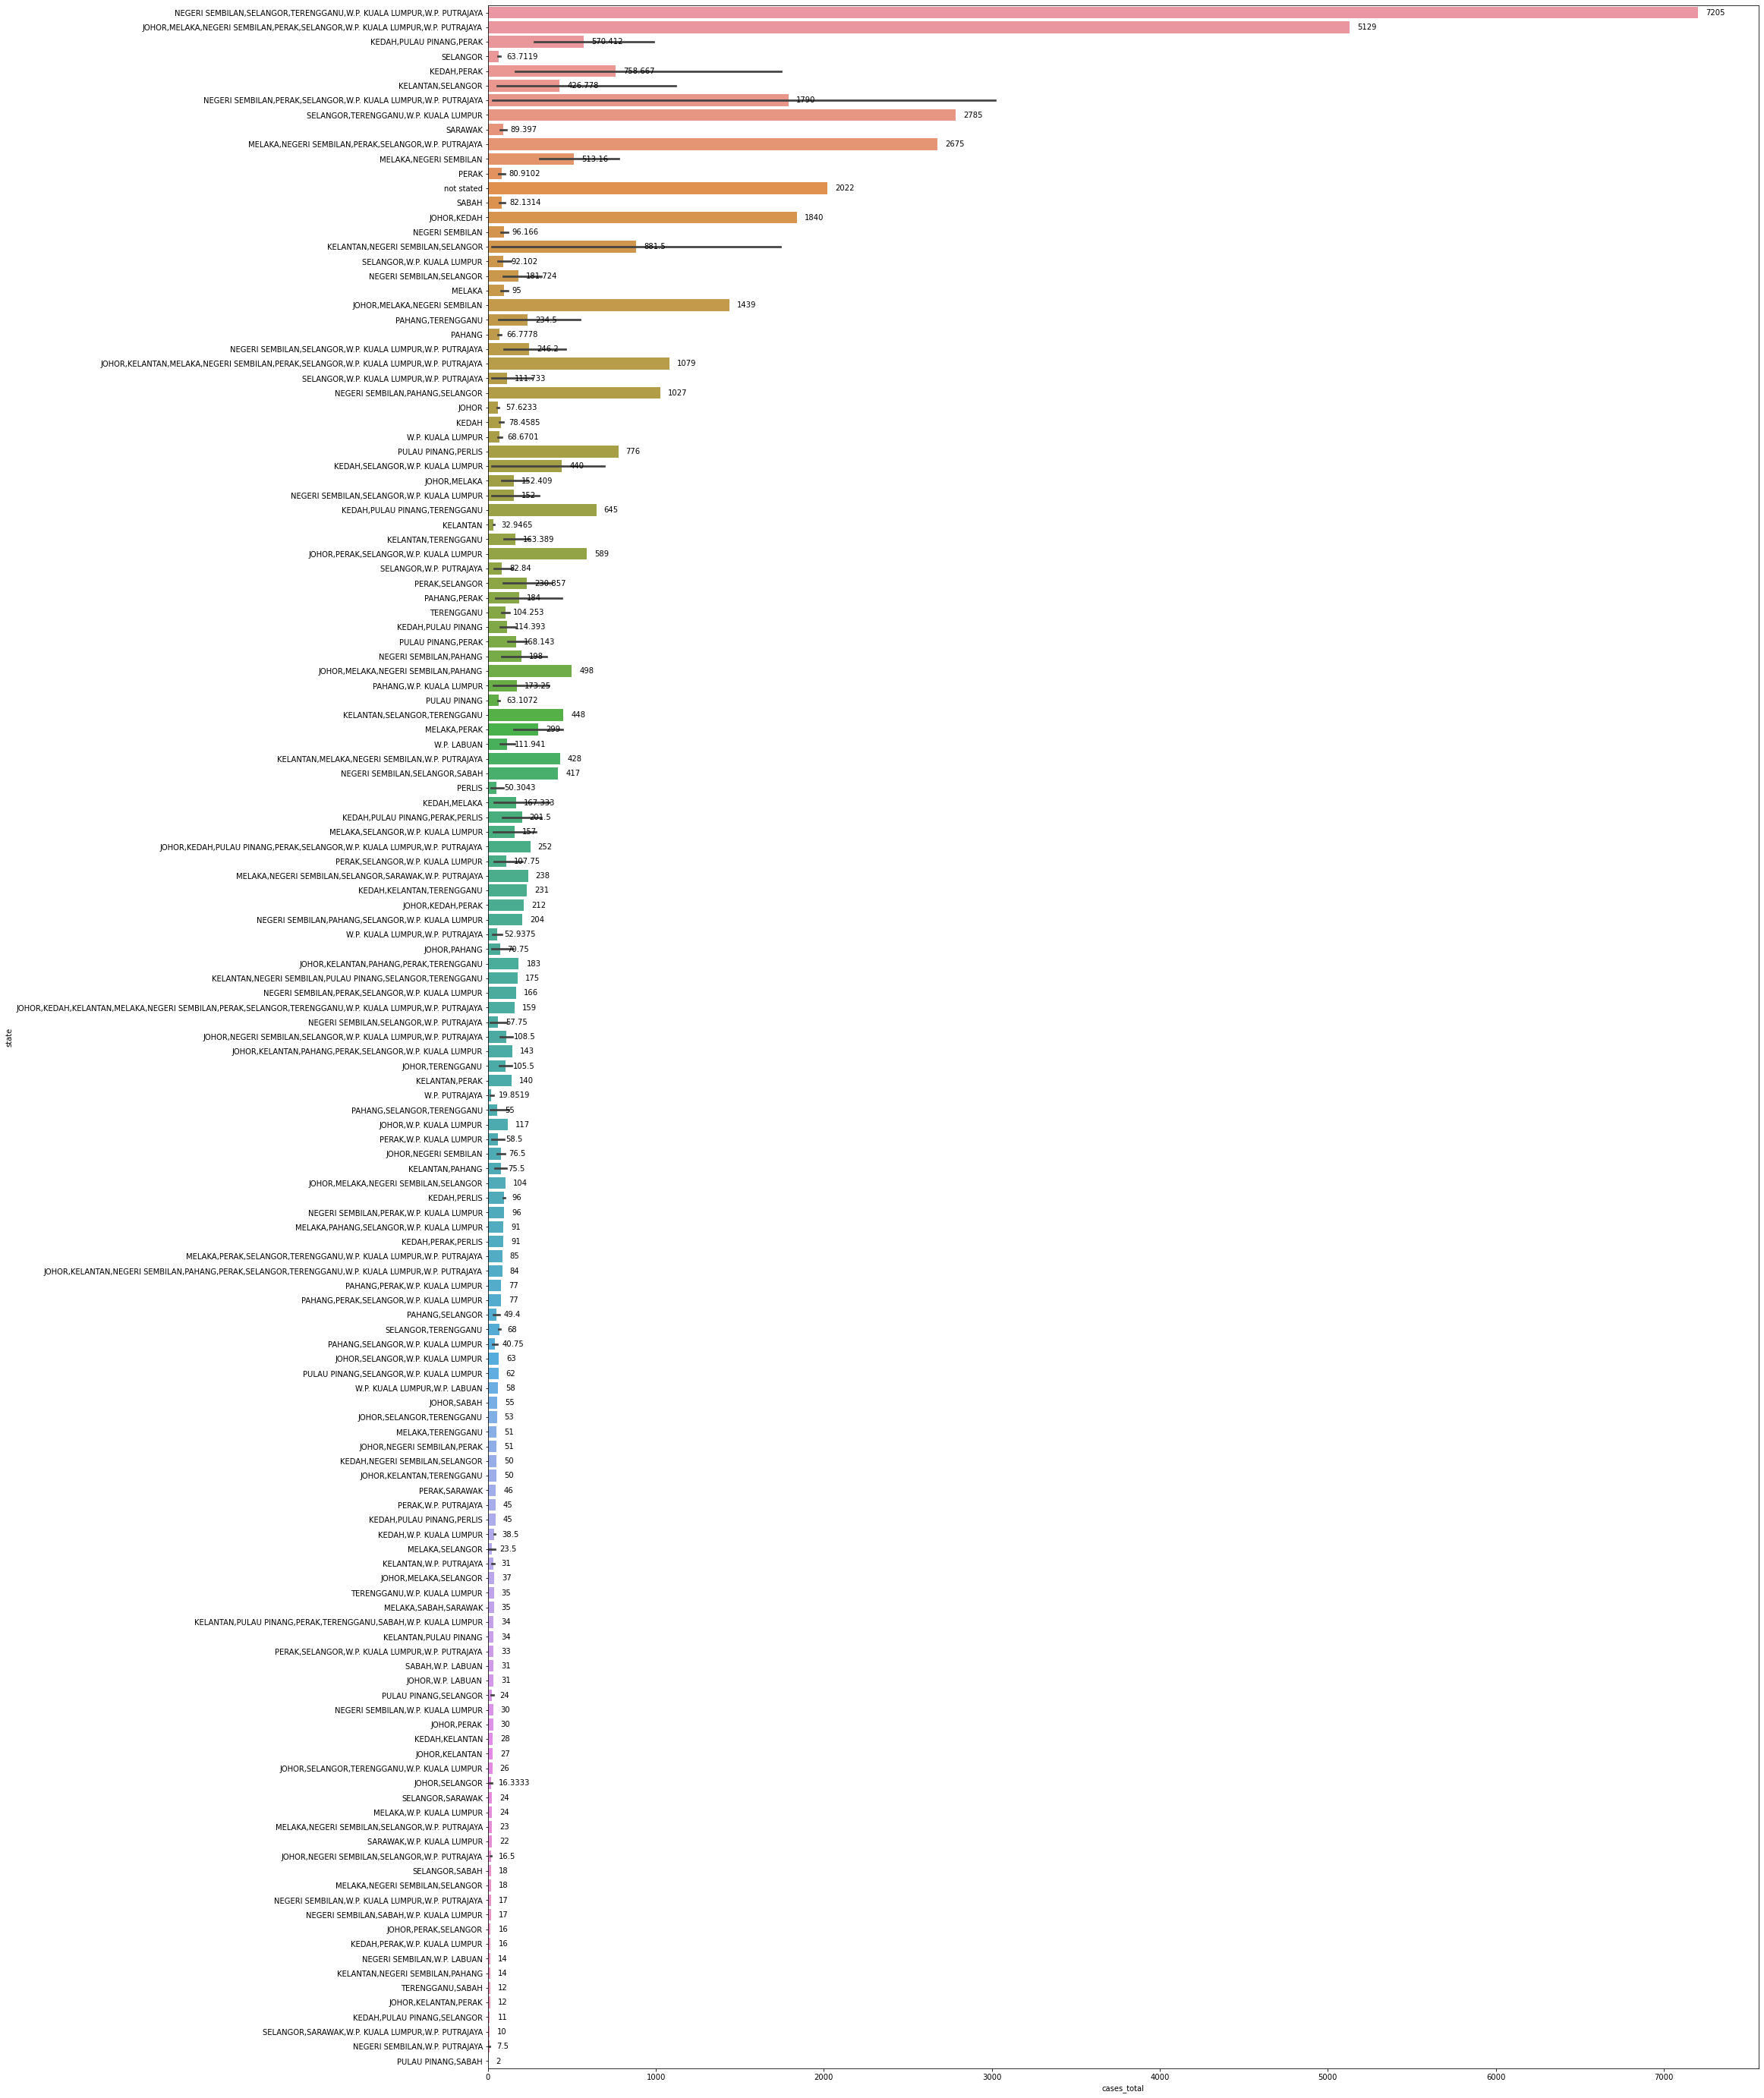

In [5]:
##visualise in boxplot for total cases by states
# Draw barplot

plt.figure(figsize=(30,50))
ax = sns.barplot(x='cases_total',y='state',data=Total_cases)
ax.bar_label(ax.containers[0],padding=10,fmt='%g');
plt.show()

## Highest cases in each state based on categories

             category  cases_total
0           workplace         7205
1     detentionCentre         5129
2           workplace         3593
3           workplace         3443
4     detentionCentre         3169
...               ...          ...
7151        workplace            2
7152        community            2
7153           import            2
7154           import            2
7155        community            2

[7156 rows x 2 columns]


,category,cases_total
0,workplace,7205


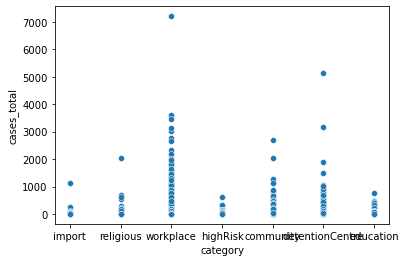

In [6]:
#cases in states with the highest cases based on categories
#States with the highest number of cases

category = clusters[['category','cases_total']].sort_values(by=['cases_total'],ascending=False).reset_index(drop=True)
print(category)



sns.scatterplot(data = clusters
                ,x = 'category'
                ,y = 'cases_total'
                )
category.loc[category["cases_total"]>7000]

## Active cases based on states

                state  cases_active
0              MELAKA           197
1               PERAK           144
2            SELANGOR           125
3     NEGERI SEMBILAN           112
4        PULAU PINANG           110
...               ...           ...
7151     PULAU PINANG             0
7152            SABAH             0
7153          SARAWAK             0
7154         SELANGOR             0
7155            SABAH             0

[7156 rows x 2 columns]


,state,cases_active


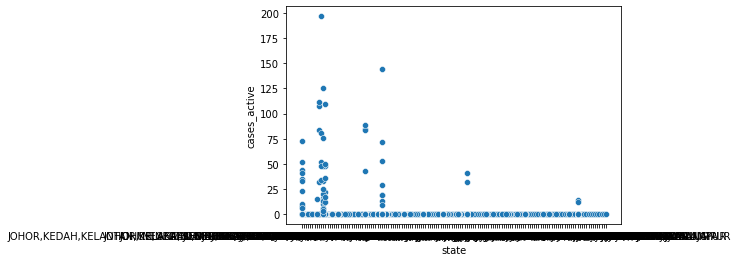

In [7]:
#current active cases in states

active = clusters[['state','cases_active']].sort_values(by=['cases_active'],ascending=False).reset_index(drop=True)
print(active)

# Draw scatterplot
sns.scatterplot(data = clusters
                ,x = 'state'
                ,y = 'cases_active'
               )
                
active.loc[active["cases_active"]>7000]

## States with highest deaths

In [11]:
death = clusters[['state','deaths']].sort_values(by=['deaths'],ascending=False).reset_index(drop=True)


pivot = death.pivot_table(index=['state'], values=['deaths'],aggfunc ='sum')
print(pivot)

death.loc[death['deaths'] > 7000]


                                                    deaths
state                                                     
JOHOR                                                  318
JOHOR,KEDAH                                              0
JOHOR,KEDAH,KELANTAN,MELAKA,NEGERI SEMBILAN,PER...       0
JOHOR,KEDAH,PERAK                                        2
JOHOR,KEDAH,PULAU PINANG,PERAK,SELANGOR,W.P. KU...       4
...                                                    ...
W.P. KUALA LUMPUR,W.P. LABUAN                            1
W.P. KUALA LUMPUR,W.P. PUTRAJAYA                         3
W.P. LABUAN                                             33
W.P. PUTRAJAYA                                           0
not stated                                              34

[141 rows x 1 columns]


,state,deaths
